<a href="https://colab.research.google.com/github/putudewik/DataAnalytics/blob/main/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
ls

 Combined_News_DJIA.csv   kaggle.json     'segmentation data.csv'
 data.csv                 RedditNews.csv   upload_DJIA_table.csv


In [5]:
import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv("segmentation data.csv")
print("Dataset Loaded..")
df.head()

Dataset Loaded..


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [7]:
df.shape

(2000, 8)

In [8]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [9]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [10]:
df['Sex'].value_counts()

0    1086
1     914
Name: Sex, dtype: int64

In [11]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

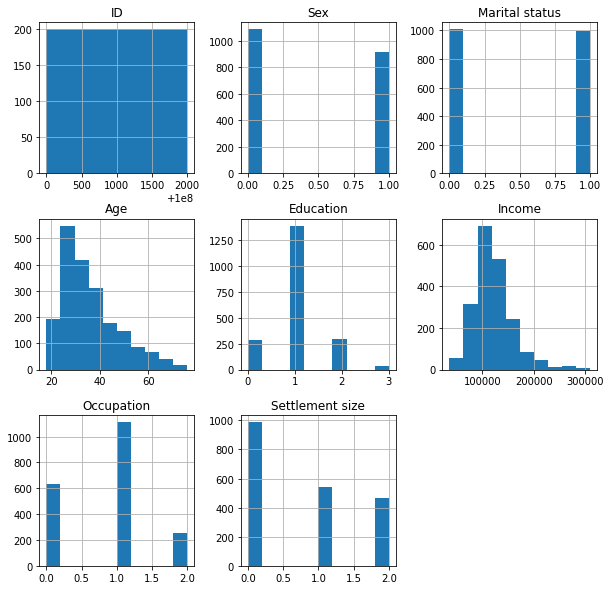

In [13]:
df.hist(figsize =(10,10))
plt.show()

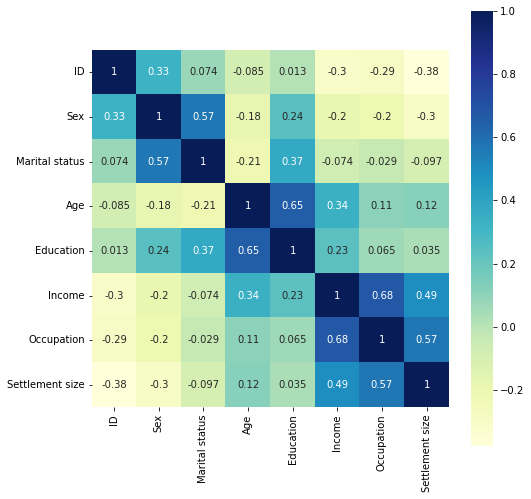

In [14]:
df = df[['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size']] #Subsetting the data
cor = df.corr() #Calculate the correlation of the above variables

fig,ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(8)
sns.heatmap(cor, square = True,annot=True,cmap="YlGnBu") #Plot the correlation as heat map

In [15]:
scaler = StandardScaler()
scaler.fit_transform(df)

array([[-1.731185  , -0.91739884, -0.99302433, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [-1.72945295,  1.09003844,  1.00702467, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-1.7277209 , -0.91739884, -0.99302433, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [ 1.7277209 , -0.91739884, -0.99302433, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.72945295,  1.09003844,  1.00702467, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [ 1.731185  , -0.91739884, -0.99302433, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [16]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [17]:
def doKmeans(x, nclust=3):
    model = KMeans(nclust)
    model.fit(x)
    clust_labels = model.predict(x)
    cent = model.cluster_centers_
    return (clust_labels, cent)

In [18]:
clust_labels, cent = doKmeans(df, 2)
kmeans = pd.DataFrame(clust_labels)
df.insert((df.shape[1]),'kmeans',kmeans)

In [19]:
df.head(n=10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,kmeans
0,100000001,0,0,67,2,124670,1,2,0
1,100000002,1,1,22,1,150773,1,2,1
2,100000003,0,0,49,1,89210,0,0,0
3,100000004,0,0,45,1,171565,1,1,1
4,100000005,0,0,53,1,149031,1,1,1
5,100000006,0,0,35,1,144848,0,0,1
6,100000007,0,0,53,1,156495,1,1,1
7,100000008,0,0,35,1,193621,2,1,1
8,100000009,0,1,61,2,151591,0,0,1
9,100000010,0,1,28,1,174646,2,0,1


In [20]:
def condition(x):
    if x == 0:
        x = "cluster0"
    elif x == 1:
        x = "cluster1"
    else:
        x = "cluster2"
    
    return x

# df["cluster_name"] = df["kmeans"].apply(lambda x: "cluster0" if x == 0 else "cluster1")
df["cluster_name"] = df["kmeans"].apply(lambda x: condition(x))

In [21]:
df.head(15)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,kmeans,cluster_name
0,100000001,0,0,67,2,124670,1,2,0,cluster0
1,100000002,1,1,22,1,150773,1,2,1,cluster1
2,100000003,0,0,49,1,89210,0,0,0,cluster0
3,100000004,0,0,45,1,171565,1,1,1,cluster1
4,100000005,0,0,53,1,149031,1,1,1,cluster1
5,100000006,0,0,35,1,144848,0,0,1,cluster1
6,100000007,0,0,53,1,156495,1,1,1,cluster1
7,100000008,0,0,35,1,193621,2,1,1,cluster1
8,100000009,0,1,61,2,151591,0,0,1,cluster1
9,100000010,0,1,28,1,174646,2,0,1,cluster1


In [22]:
df[df['cluster_name'] == 'cluster0']

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,kmeans,cluster_name
0,100000001,0,0,67,2,124670,1,2,0,cluster0
2,100000003,0,0,49,1,89210,0,0,0,cluster0
10,100000011,1,1,25,1,108469,1,0,0,cluster0
11,100000012,1,1,24,1,127596,1,0,0,cluster0
12,100000013,1,1,22,1,108687,1,2,0,cluster0
...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,0,cluster0
1996,100001997,1,1,27,1,117744,1,0,0,cluster0
1997,100001998,0,0,31,0,86400,0,0,0,cluster0
1998,100001999,1,1,24,1,97968,0,0,0,cluster0


In [23]:
df[df['cluster_name'] == 'cluster1']

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,kmeans,cluster_name
1,100000002,1,1,22,1,150773,1,2,1,cluster1
3,100000004,0,0,45,1,171565,1,1,1,cluster1
4,100000005,0,0,53,1,149031,1,1,1,cluster1
5,100000006,0,0,35,1,144848,0,0,1,cluster1
6,100000007,0,0,53,1,156495,1,1,1,cluster1
...,...,...,...,...,...,...,...,...,...,...
1550,100001551,1,1,37,1,145140,1,1,1,cluster1
1583,100001584,1,1,31,1,138307,1,1,1,cluster1
1592,100001593,1,1,44,2,143343,1,1,1,cluster1
1594,100001595,1,0,33,1,138525,1,1,1,cluster1


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


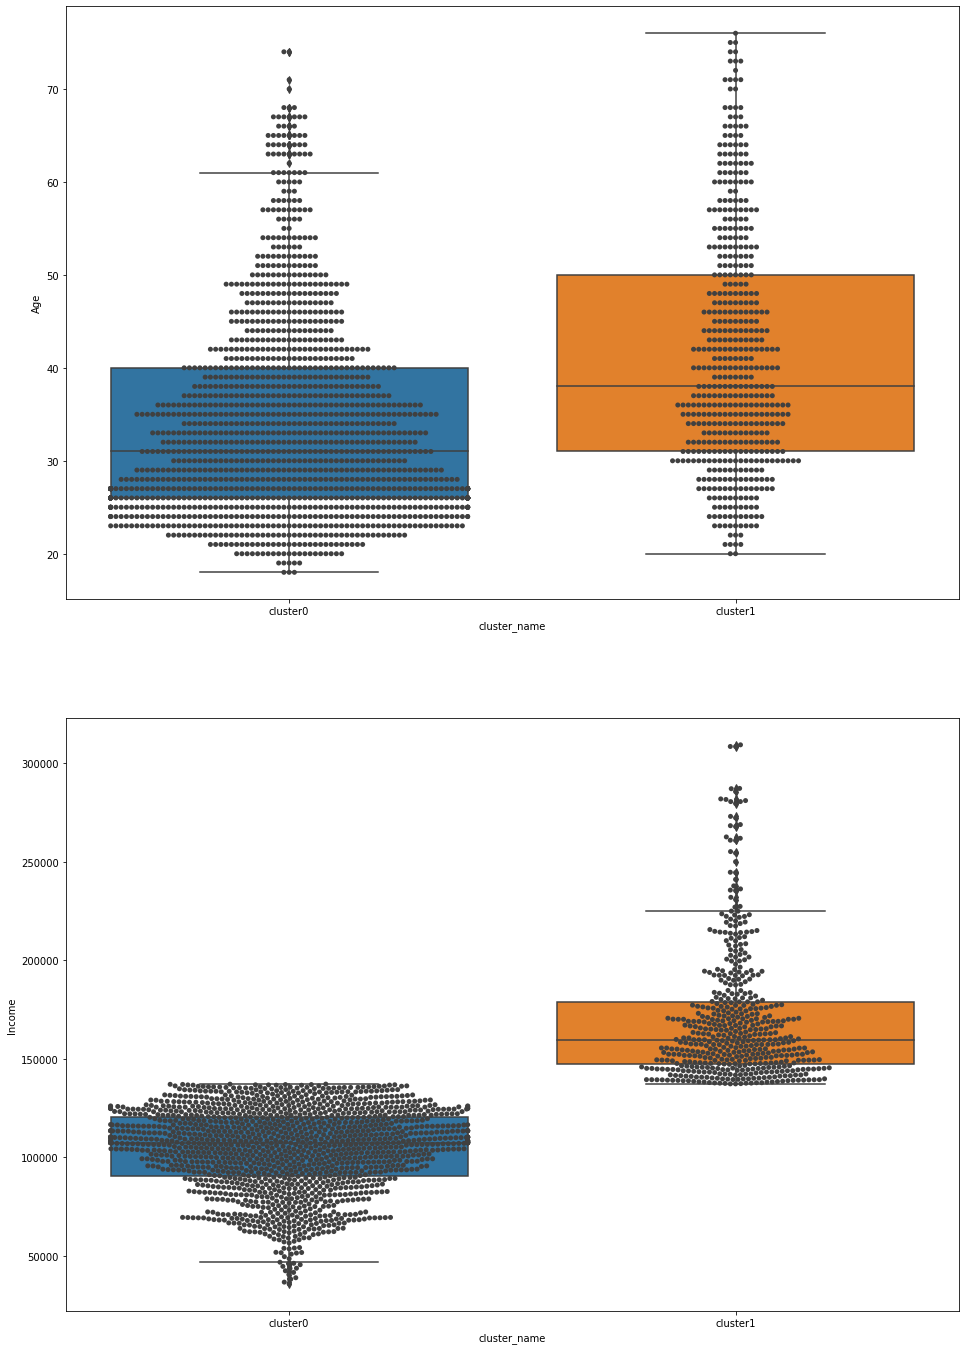

In [24]:
fig, (ax2,ax3) = plt.subplots(nrows = 2)
fig.set_figwidth(16)
fig.set_figheight(24)

# Cluster analysis of customers
x = sns.boxplot(x="cluster_name", y='Age', data=df, ax= ax2)
x = sns.swarmplot(x="cluster_name", y='Age', data=df,color=".25",ax= ax2)
# Cluster analysis of clusters
x = sns.boxplot(x="cluster_name", y='Income', data=df, ax= ax3)
x = sns.swarmplot(x="cluster_name", y='Income', data=df,color=".25",ax= ax3)

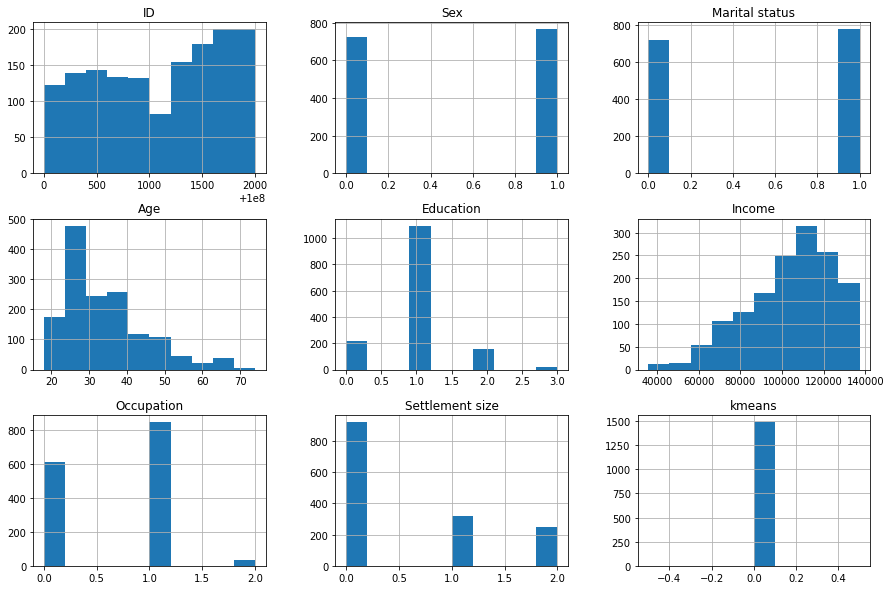

In [25]:
df[df['cluster_name'] == 'cluster0'].hist(figsize = (15,10))
plt.show()

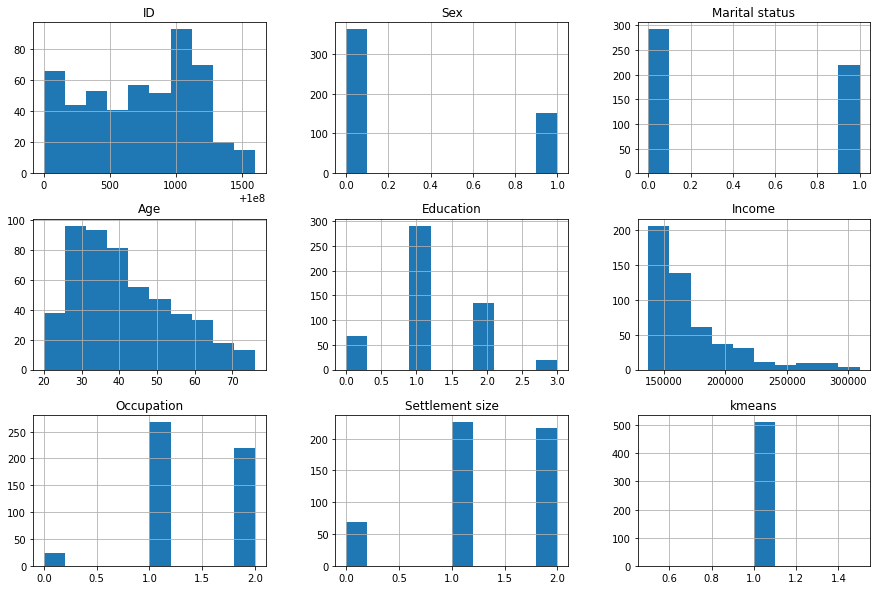

In [26]:
df[df['cluster_name'] == 'cluster1'].hist(figsize = (15,10))
plt.show()

In [37]:
from sklearn.metrics import accuracy_score
print("Accuracy score for kmeans algorithm is",accuracy_score(clust_labels,kmeans ))

Accuracy score for kmeans algorithm is 1.0
